### import statements

In [1]:
%matplotlib inline
import sys
import os
import pandas as pd
sys.path.append('../src')
# from utils import load_weather
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import gaussian_kde

### constants

In [2]:
F_INPUT = '../../data/data.merged.pandas.h5'

In [7]:
feats = ['pressure', 'relative_humidity', 'temperature', 'wind_speed', 'month', 'Cn2', 'solar_zenith_angle']
label = 'r0'

### read data

In [3]:
df = pd.read_hdf(F_INPUT, 'resampled/median')

### add new features

In [4]:
df['month'] = df['datenum'].index.month

### restricting data to usable, relatively dense subset

In [5]:
df_subset = df[(df.index >= '2018-10-01') & (df.index < '2019-01-01')]

In [6]:
df_subset.describe()

,pressure,relative_humidity,temperature,wind_direction,wind_speed,datenum,o(I)_I,r0,solar_zenith_angle,Cn2,month
count,128294.000000,128294.000000,128294.000000,132309.000000,132309.000000,51822.000000,25670.000000,51822.000000,51822.000000,1.160820e+05,132480.000000
mean,774.035263,40.750269,6.626315,166.847920,2.219250,737376.459411,0.001444,5.982451,96.471342,1.460209e-15,11.000000
std,4.081847,28.705258,5.102259,76.334054,1.521876,26.297726,0.000458,3.174025,40.110685,1.944157e-15,0.820925
min,758.400000,2.000000,-10.300000,3.578947,0.100000,737334.099005,0.000341,0.986535,37.768087,1.180600e-18,10.000000
25%,772.000000,19.000000,3.500000,91.900000,1.145000,737353.501311,0.001102,3.444640,58.793091,2.865725e-16,10.000000
50%,774.500000,32.000000,6.800000,180.400000,1.820000,737374.316944,0.001429,5.429000,95.804247,8.191250e-16,11.000000
75%,776.800000,57.000000,9.800000,226.950000,2.870000,737396.699463,0.001735,7.832000,134.399380,1.807000e-15,12.000000
max,783.800000,103.000000,22.800000,357.650000,12.515789,737425.961285,0.003461,25.415223,169.053912,1.995200e-14,12.000000


### finding non-nan values

In [8]:
valid = ~df_subset.isnull().any(axis=1)

In [9]:
df_subset[valid].count()

pressure              24233
relative_humidity     24233
temperature           24233
wind_direction        24233
wind_speed            24233
datenum               24233
o(I)_I                24233
r0                    24233
solar_zenith_angle    24233
Cn2                   24233
month                 24233
dtype: int64

### splitting into train and test

In [10]:
train = df_subset.index <= '2018-12-10'
test  = df_subset.index > '2018-12-10'

In [11]:
df_subset.loc[train & valid,feats].count()

pressure              20119
relative_humidity     20119
temperature           20119
wind_speed            20119
month                 20119
Cn2                   20119
solar_zenith_angle    20119
dtype: int64

In [12]:
df_subset.loc[test & valid,feats].count()

pressure              4114
relative_humidity     4114
temperature           4114
wind_speed            4114
month                 4114
Cn2                   4114
solar_zenith_angle    4114
dtype: int64

### initializing the RF regressor

In [13]:
regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(df_subset.loc[train&valid,feats], df_subset.loc[train&valid,label])

RandomForestRegressor(random_state=0)

### predict on test set

In [ ]:
preds = regr.predict(df_subset.loc[test&valid,feats])

### evaluation

In [ ]:
r2 = regr.score(df_subset.loc[test&valid,feats], df_subset.loc[test&valid,label])

In [ ]:
r2

In [ ]:
def error_diff(targ, pred):
    return targ-pred
def error_perc(targ, pred):
    return (targ-pred)/targ

### plots

In [ ]:
r0_bins = np.arange(0,25,0.5)
act_pred_scatter_xbins, act_pred_scatter_ybins = np.meshgrid(r0_bins, r0_bins)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
s = 25
a = 0.4
ax[0].scatter(df_subset.loc[test&valid,label],
           preds,
           edgecolor='k', c="cornflowerblue", s=s, alpha=a)
# ax[0].hist2d(df_subset.loc[test&valid,label],
#            preds,act_pred_scatter_bins, cmap='jet')
x = np.linspace(df_subset.loc[test&valid,label].min(), df_subset.loc[test&valid,label].max(), 1000)
ax[0].plot(x, x, 'r-')
ax[0].set_xlabel("Actual r0")
ax[0].set_ylabel("Predicted r0")
ax[0].set_xticks(np.arange(0, 25))
ax[0].set_yticks(np.arange(0, 25))

ax[1].scatter(df_subset.loc[test&valid,label],
              error_perc(df_subset.loc[test&valid,label], preds),
              edgecolor='k', c="forestgreen", s=s, alpha=a)
ax[1].plot(x, np.zeros(x.shape), 'r-')
ax[1].set_xlabel("Actual r0")
ax[1].set_ylabel("Error r0")
ax[1].set_xticks(np.arange(0, 25))


plt.show()


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
s = 25
a = 0.4
ax[0].scatter(df_subset.loc[test&valid,label],
           preds,
           edgecolor='k', c="cornflowerblue", s=s, alpha=a)
# ax[0].hist2d(df_subset.loc[test&valid,label],
#            preds,act_pred_scatter_bins, cmap='jet')
x = np.linspace(df_subset.loc[test&valid,label].min(), df_subset.loc[test&valid,label].max(), 1000)
ax[0].plot(x, x, 'r-')
ax[0].set_xlabel("Actual r0")
ax[0].set_ylabel("Predicted r0")
ax[0].set_xticks(np.arange(0, 25))
ax[0].set_yticks(np.arange(0, 25))

ax[1].scatter(df_subset.loc[test&valid,label],
              error_perc(df_subset.loc[test&valid,label], preds),
              edgecolor='k', c="forestgreen", s=s, alpha=a)
ax[1].plot(x, np.zeros(x.shape), 'r-')
ax[1].set_xlabel("Actual r0")
ax[1].set_ylabel("Error r0")
ax[1].set_xticks(np.arange(0, 25))


plt.show()


### evaluation

In [14]:
r2 = regr.score(df_subset.loc[test&valid,feats], df_subset.loc[test&valid,label])

In [15]:
r2

0.4022089757079189

In [24]:
def error_diff(targ, pred):
    return targ-pred
def error_perc(targ, pred):
    return (targ-pred)/targ

### plots

In [25]:
r0_bins = np.arange(0,25,0.5)
act_pred_scatter_xbins, act_pred_scatter_ybins = np.meshgrid(r0_bins, r0_bins)

<IPython.core.display.Javascript object>


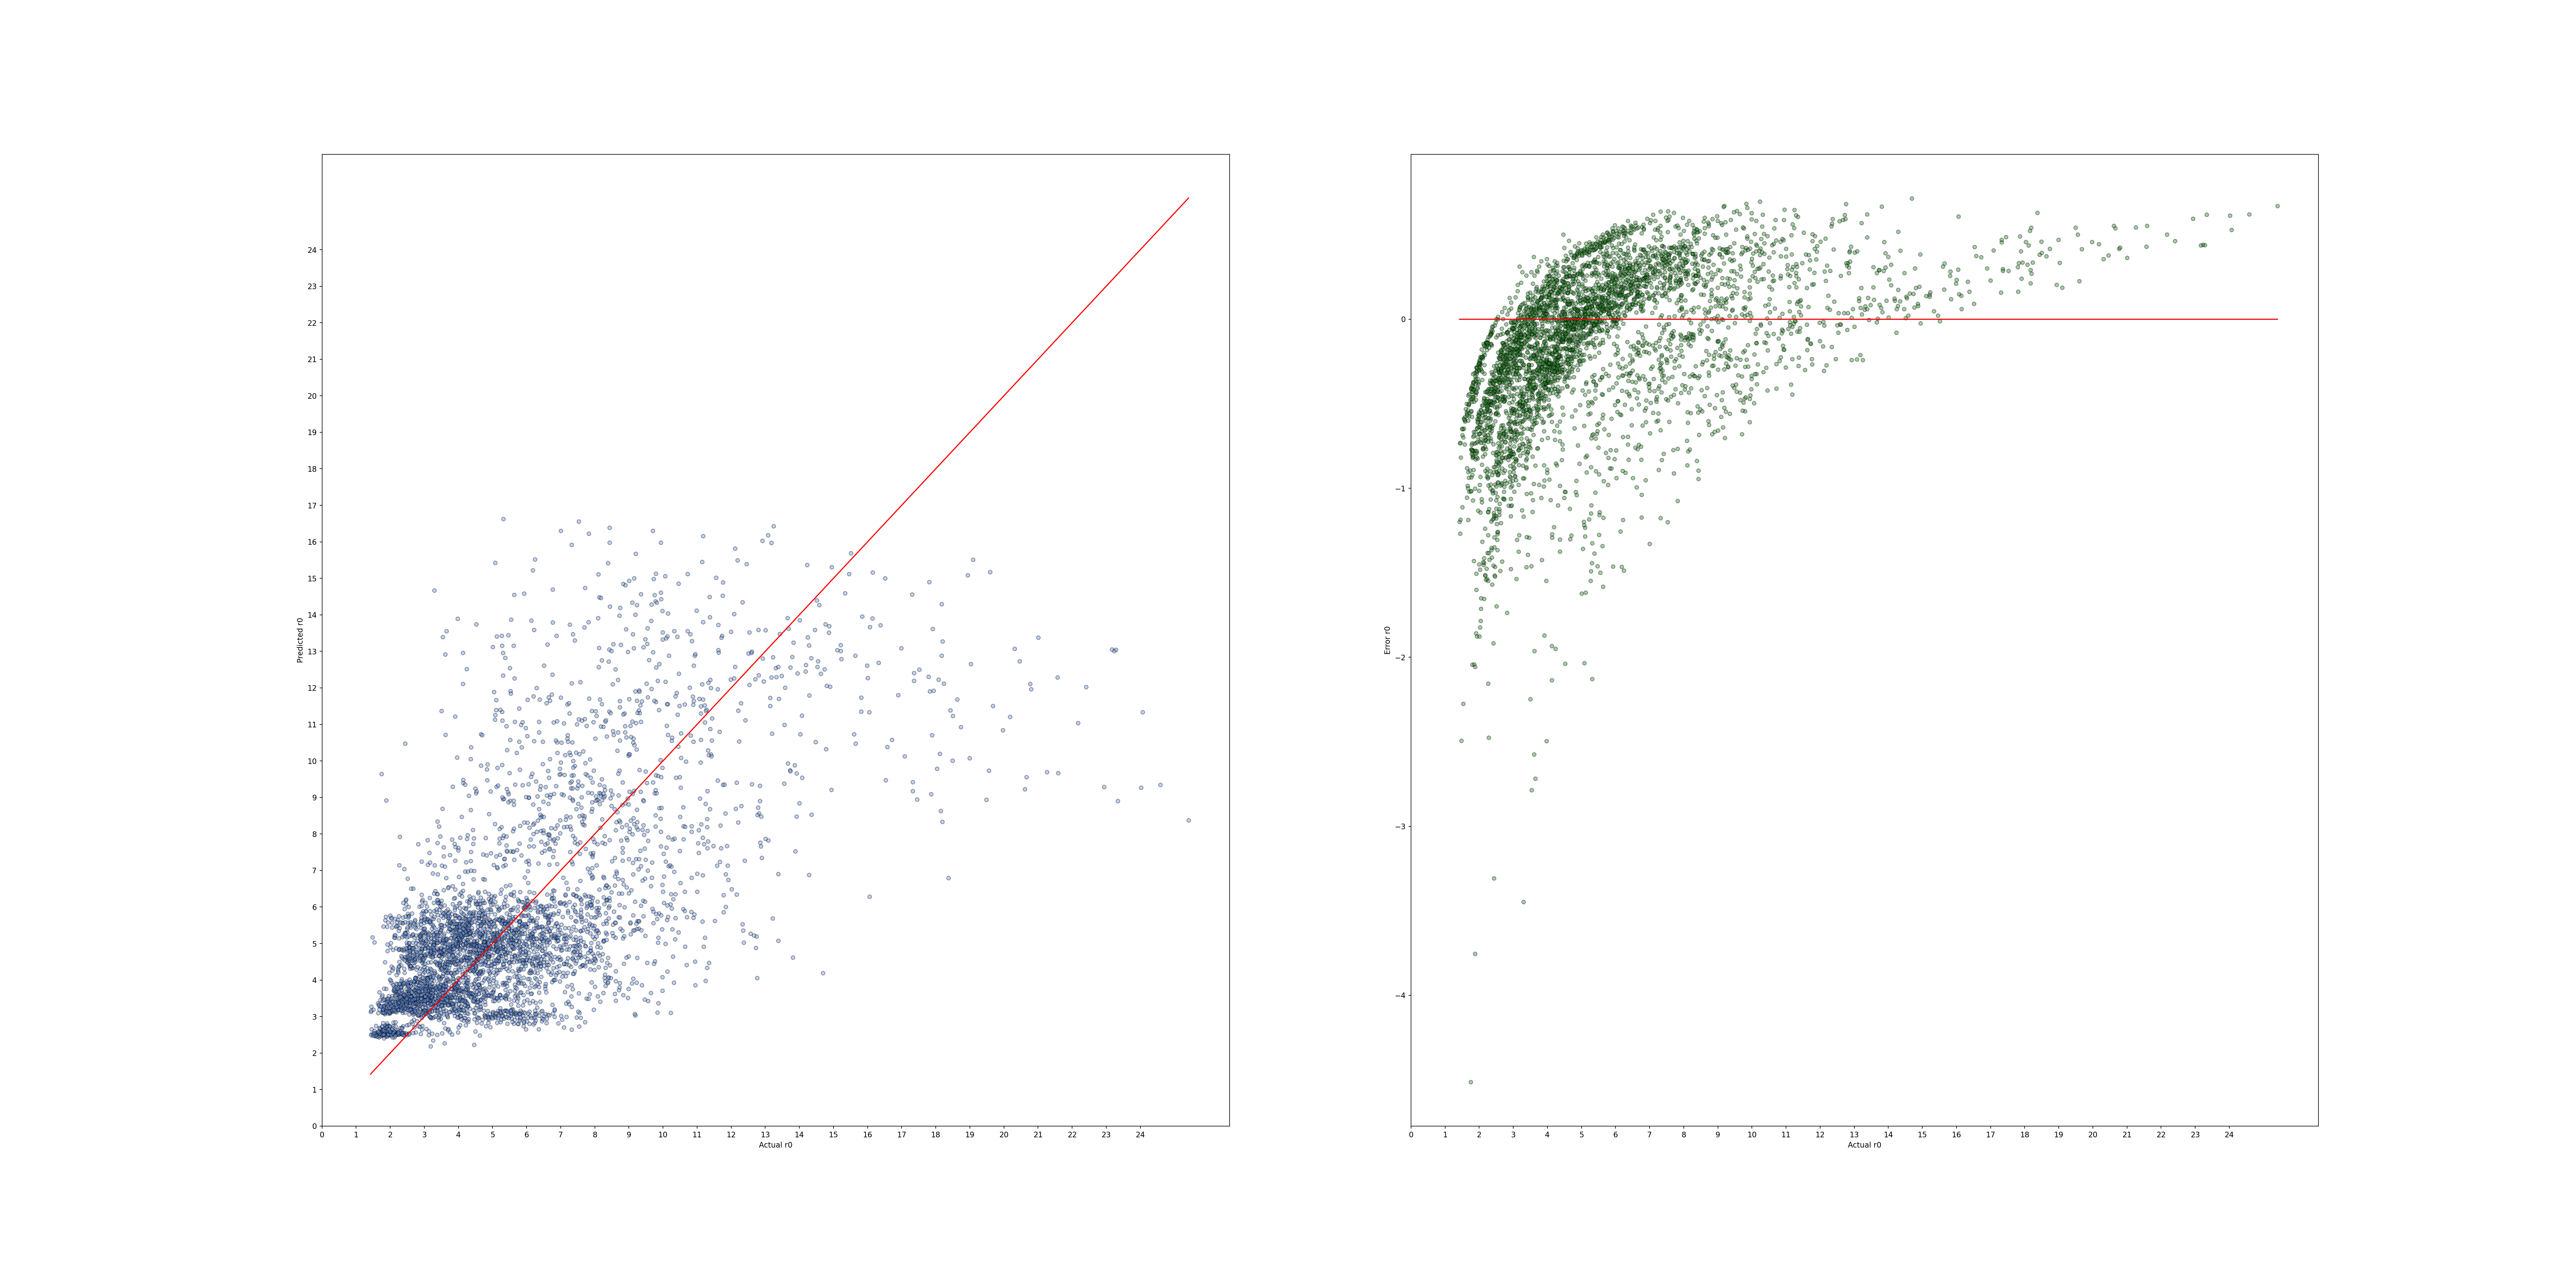

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
s = 25
a = 0.4
ax[0].scatter(df_subset.loc[test&valid,label],
           preds,
           edgecolor='k', c="cornflowerblue", s=s, alpha=a)
# ax[0].hist2d(df_subset.loc[test&valid,label],
#            preds,act_pred_scatter_bins, cmap='jet')
x = np.linspace(df_subset.loc[test&valid,label].min(), df_subset.loc[test&valid,label].max(), 1000)
ax[0].plot(x, x, 'r-')
ax[0].set_xlabel("Actual r0")
ax[0].set_ylabel("Predicted r0")
ax[0].set_xticks(np.arange(0, 25))
ax[0].set_yticks(np.arange(0, 25))

ax[1].scatter(df_subset.loc[test&valid,label],
              error_perc(df_subset.loc[test&valid,label], preds),
              edgecolor='k', c="forestgreen", s=s, alpha=a)
ax[1].plot(x, np.zeros(x.shape), 'r-')
ax[1].set_xlabel("Actual r0")
ax[1].set_ylabel("Error r0")
ax[1].set_xticks(np.arange(0, 25))


plt.show()
